# Diversity orthogonality
In this notebook we explore the hypothesis that social capital is not the same as diversity (HHI index, entropy, etc...) given that it takes into account more neighbours

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [2]:
df = pd.read_parquet('data_model.parquet')

centralities = ['pagerank', 'gfi', 'bridging', 'favor']

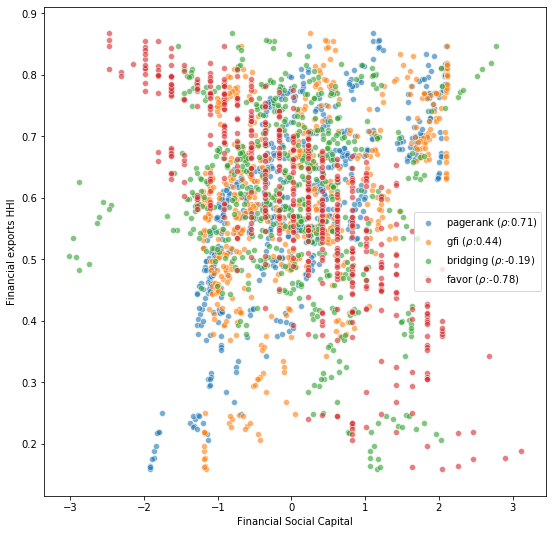

,centrality,financial pearson,financial p-value pearsonr,financial spearman,financial p-value spearman
0,pagerank,0.710072,6.815655e-89,0.721144,6.402415e-93
1,gfi,0.444967,3.654593e-29,0.439554,2.017561e-28
2,bridging,-0.188212,5.840323e-06,-0.161846,1.010784e-04
3,favor,-0.783168,1.034123e-119,-0.787454,6.892443e-122


In [3]:
fig, ax = plt.subplots(figsize=(9,9))

for c in centralities:
    sns.scatterplot(df['financial_'+c], 
                y = df['financial_hhi'], 
                ax=ax, 
                label = c, 
                alpha = 0.6)
    
plt.xlabel('Financial Social Capital')
plt.ylabel('Financial exports HHI')

plt.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i, l in enumerate(L_labels):
    centrality = l.get_text()
    corr = pearsonr(df['financial_hhi'], df['financial_' + centrality])[0]
    text = centrality + f' ($\\rho$:{round(corr,2)})'
    L_labels[i].set_text(text)
    
plt.show()

df_correlations = pd.DataFrame({'centrality':centralities})

df_correlations['financial pearson'], df_correlations['financial p-value pearsonr'] = zip(*df_correlations.centrality.map(lambda x: pearsonr(df['financial_hhi'], df['financial_'+x])))
df_correlations['financial spearman'], df_correlations['financial p-value spearman'] = zip(*df_correlations.centrality.map(lambda x: spearmanr(df['financial_hhi'], df['financial_'+x])))

df_correlations

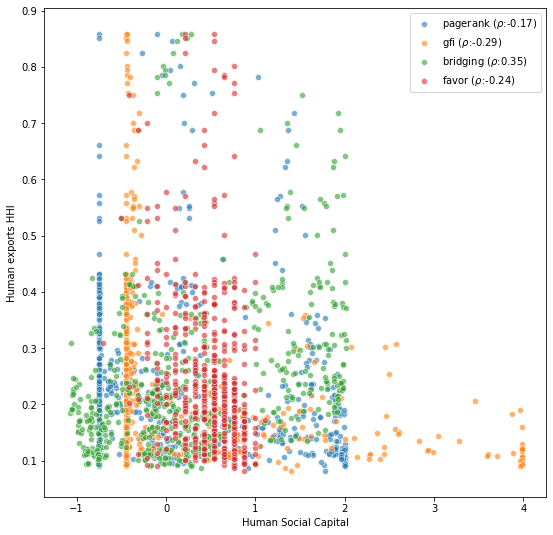

,centrality,human pearson,human p-value pearsonr,human spearman,human p-value spearman
0,pagerank,-0.167342,5.773752e-05,-0.229687,2.764143e-08
1,gfi,-0.294213,6.935479e-13,-0.276106,1.815801e-11
2,bridging,0.351084,4.912834e-18,0.379121,5.423404e-21
3,favor,-0.244570,3.090562e-09,-0.285058,3.722402e-12


In [4]:
fig, ax = plt.subplots(figsize=(9,9))

for c in centralities:
    sns.scatterplot(df['human_'+c], y = df['human_hhi'], ax=ax, label = c, 
                alpha = 0.6)
    
plt.xlabel('Human Social Capital')
plt.ylabel('Human exports HHI')

plt.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i, l in enumerate(L_labels):
    centrality = l.get_text()
    corr = pearsonr(df['human_hhi'], df['human_' + centrality])[0]
    text = centrality + f' ($\\rho$:{round(corr,2)})'
    L_labels[i].set_text(text)
    
plt.show()

df_correlations = pd.DataFrame({'centrality':centralities})

df_correlations['human pearson'], df_correlations['human p-value pearsonr'] = zip(*df_correlations.centrality.map(lambda x: pearsonr(df['human_hhi'], df['human_'+x])))
df_correlations['human spearman'], df_correlations['human p-value spearman'] = zip(*df_correlations.centrality.map(lambda x: spearmanr(df['human_hhi'], df['human_'+x])))

df_correlations